# HR Analytics Project- Understanding the Attrition in HR

Project Description :    
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics :      
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR :     
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies :     
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Loading the Dataset and showing first 5 rows

In [2]:
df_hr = pd.read_csv('C:\csv files\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Exploratory Data Analysis(EDA)

In [3]:
#checking the dimension of the dataset
df_hr.shape

(1470, 35)

This dataset contains 1470 rows and 35 columns(where 34 features and one label i.e. "Attrition").

In [4]:
#getting the information from the dataset
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Checking Data type of Columns
df_hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

There are two types of data(int and object) present in the dataset.

In [6]:
# checking for the missing values
df_hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We can see there are no missing values present in the dataset.

In [7]:
#Checking unique values of each columns
df_hr.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

From above we can see the number of unique values in each column.

In [8]:
# Checking the Unique Values of Each Column
df_hr.apply(pd.Series.unique)

Age                         [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...
Attrition                                                           [Yes, No]
BusinessTravel                 [Travel_Rarely, Travel_Frequently, Non-Travel]
DailyRate                   [1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...
Department                   [Sales, Research & Development, Human Resources]
DistanceFromHome            [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...
Education                                                     [2, 1, 4, 3, 5]
EducationField              [Life Sciences, Other, Medical, Marketing, Tec...
EmployeeCount                                                             [1]
EmployeeNumber              [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...
EnvironmentSatisfaction                                          [2, 3, 4, 1]
Gender                                                         [Female, Male]
HourlyRate                  [94, 61, 92, 56, 40, 79, 81, 67, 44,

From the above we can find the following observations.   
-Out of 35 columns we have 9 features with Object datatypes and rest are numerical types.  
-Here We have Target Variable 'Attrition' which have binar class 'Yes' and 'No'.  
-Among all Numeric Variables 'Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' are ordinal variables.   
-Columns 'EmployeeCount','EmployeeNumber','Over18' and 'StandardHours' are not giving any importantant information and are least relevant to our target variable.So we will drop them.

In [9]:
#Dropping out the unrequired columns
df_hr.drop(['EmployeeCount','EmployeeNumber', 'Over18', 'StandardHours'],axis='columns',inplace=True)

In [10]:
df_hr.shape

(1470, 31)

We can see the 4 columns have been deleted from the dataset as previously column size was 35.

#### Separating numerical and categorical columns

In [11]:
#Checking for numerical columns
num_col=[]
for i in df_hr.dtypes.index:
    if df_hr.dtypes[i]!="object":
        num_col.append(i)
print("Numerical Columns:\n", num_col)

#Checking for categorical columns
cat_col=[]
for i in df_hr.dtypes.index:
    if df_hr.dtypes[i]=="object":
        cat_col.append(i)
print("Categorical Columns:", cat_col)

Numerical Columns:
 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categorical Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


### Statistical analysis of the Numerical data

In [12]:
#summary of the dataset
df_hr.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


From the above summary,we can make the following observations.  
1.The counts of all the columns are same i.e,1470 which means there are no missing values present in it.  
2.Minimum Empolyee Age is 18 and Maximum age of employee 60.  
3.By looking at columns Monthly Income and Monthly Rate we can say outliers exist in this feature.We will investigate further.  
4.By looking at summary we can't get any information for ordinal features. 

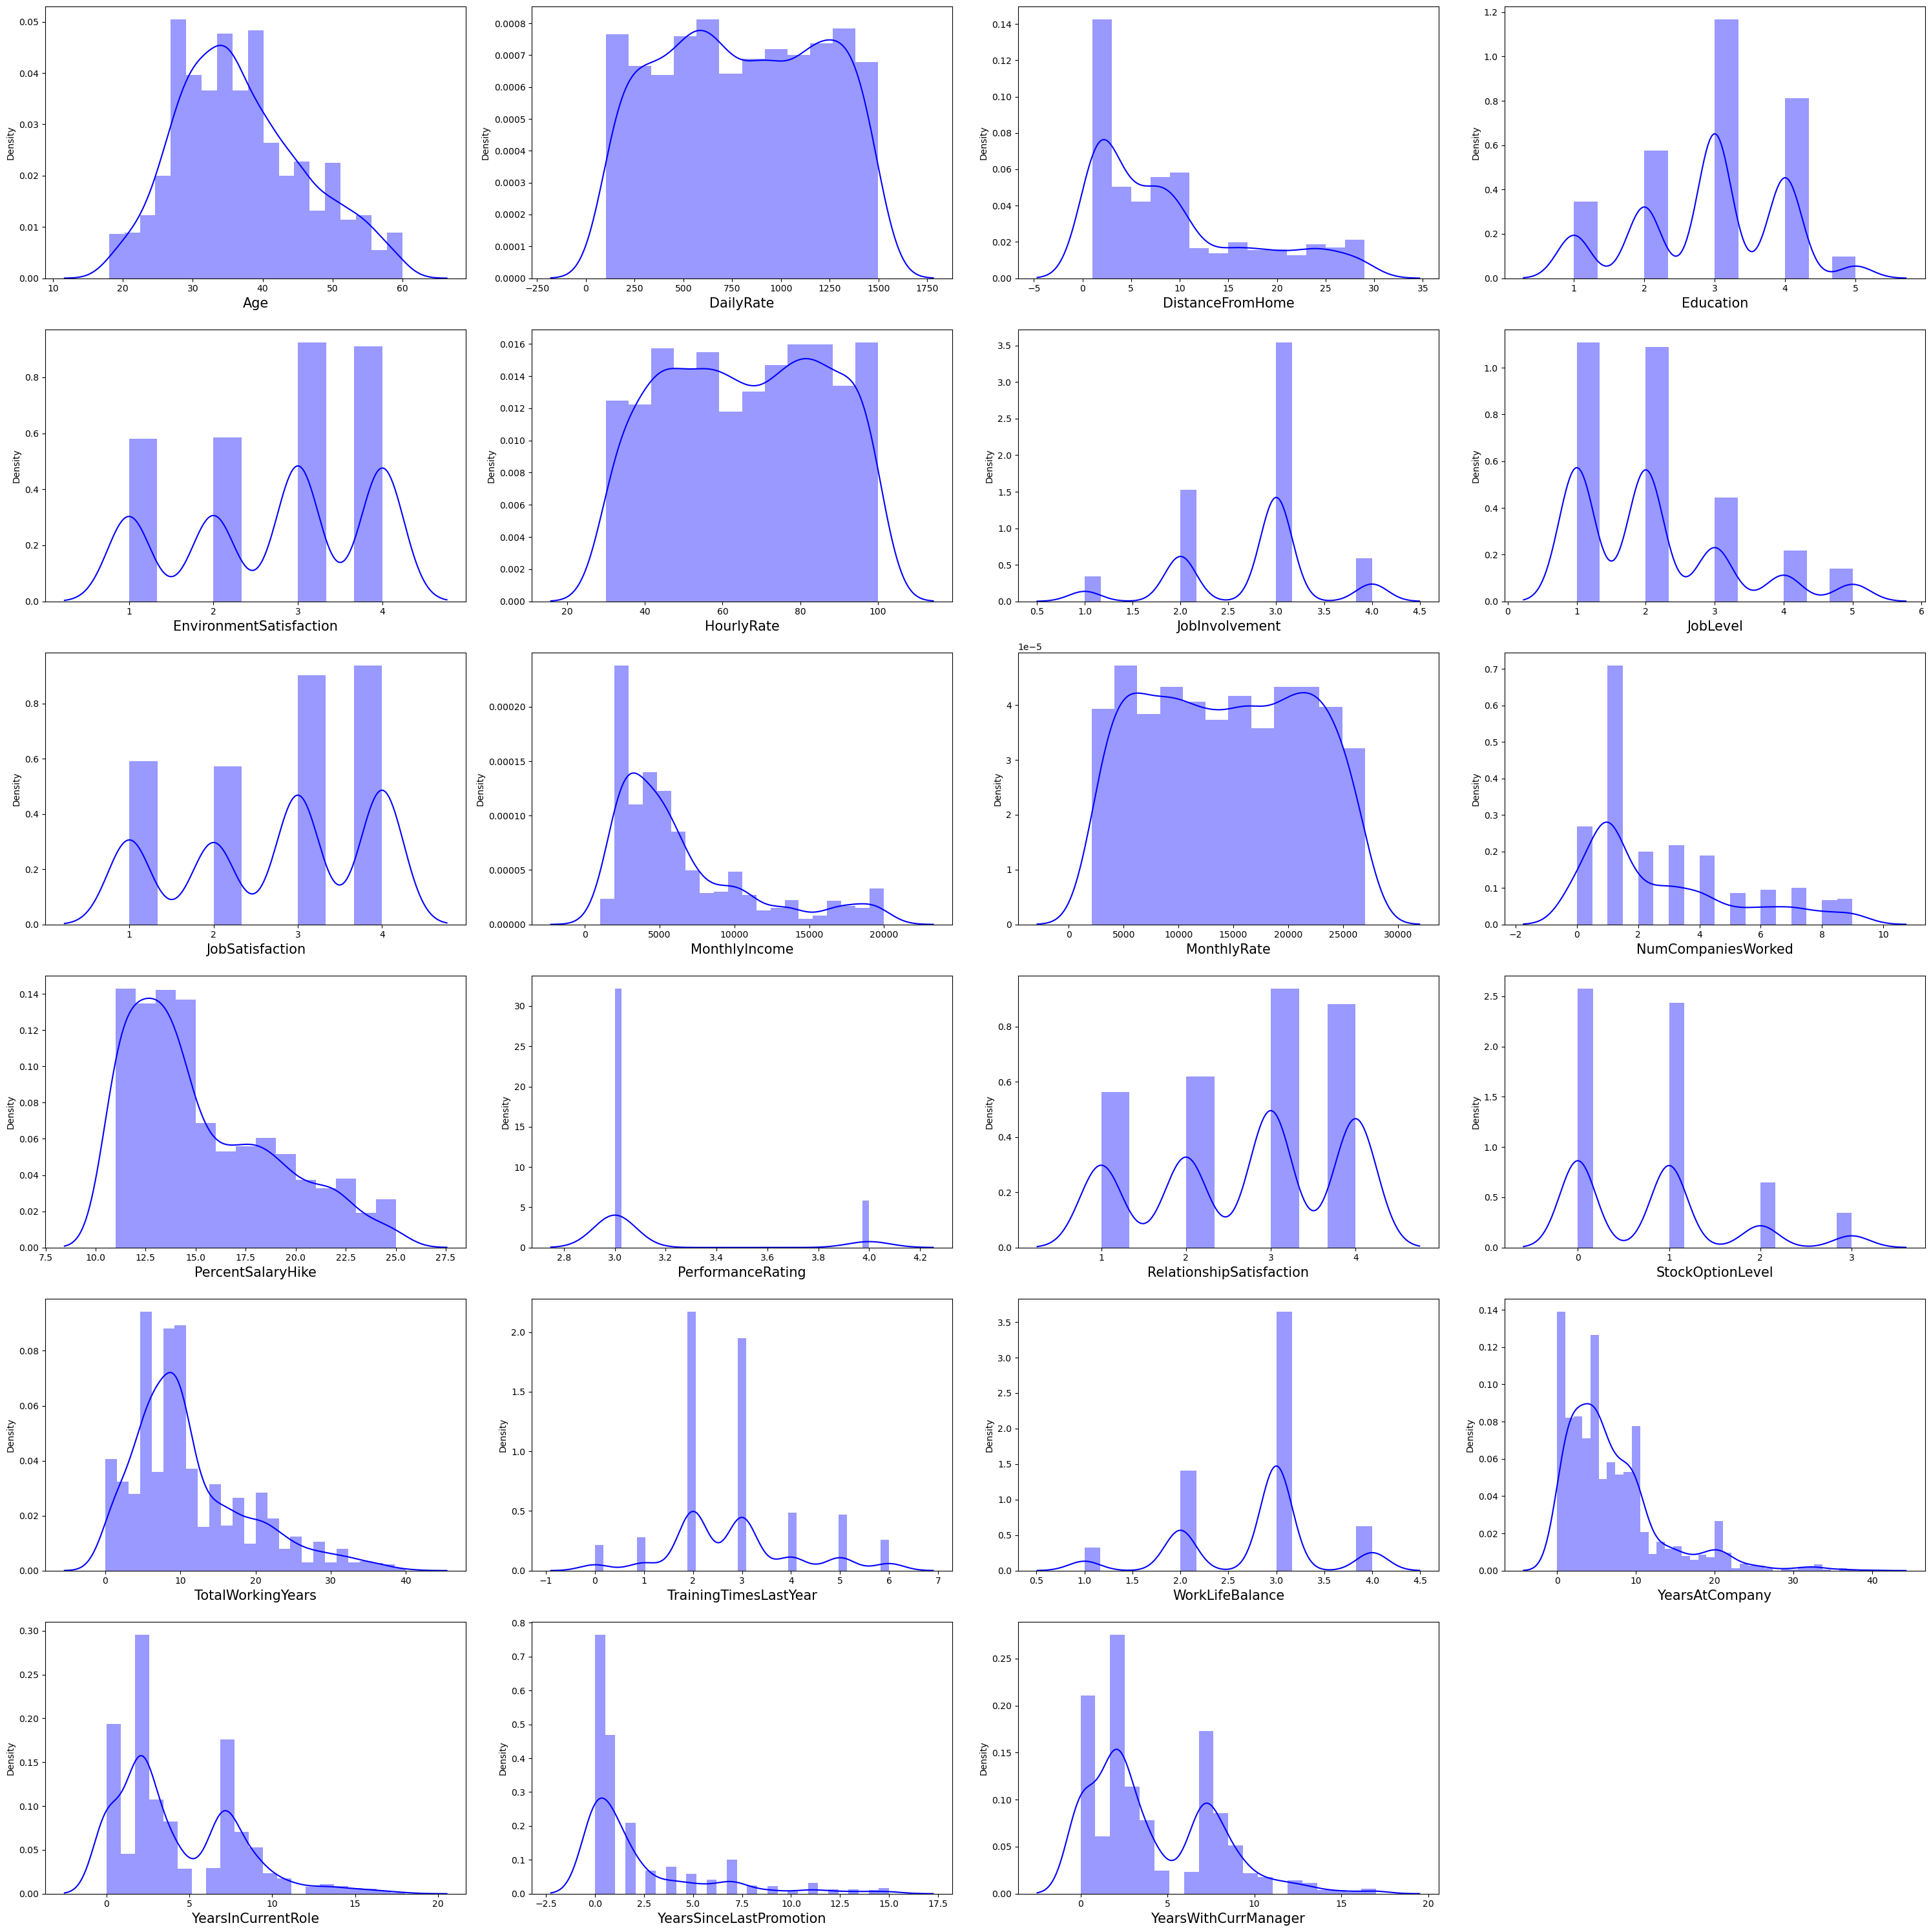

In [13]:
#visualization of data distribution for numerical column
plt.figure(figsize=(30,30),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber <= 23:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df_hr[column],color='b')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

### Visual Analysis of categorical Data

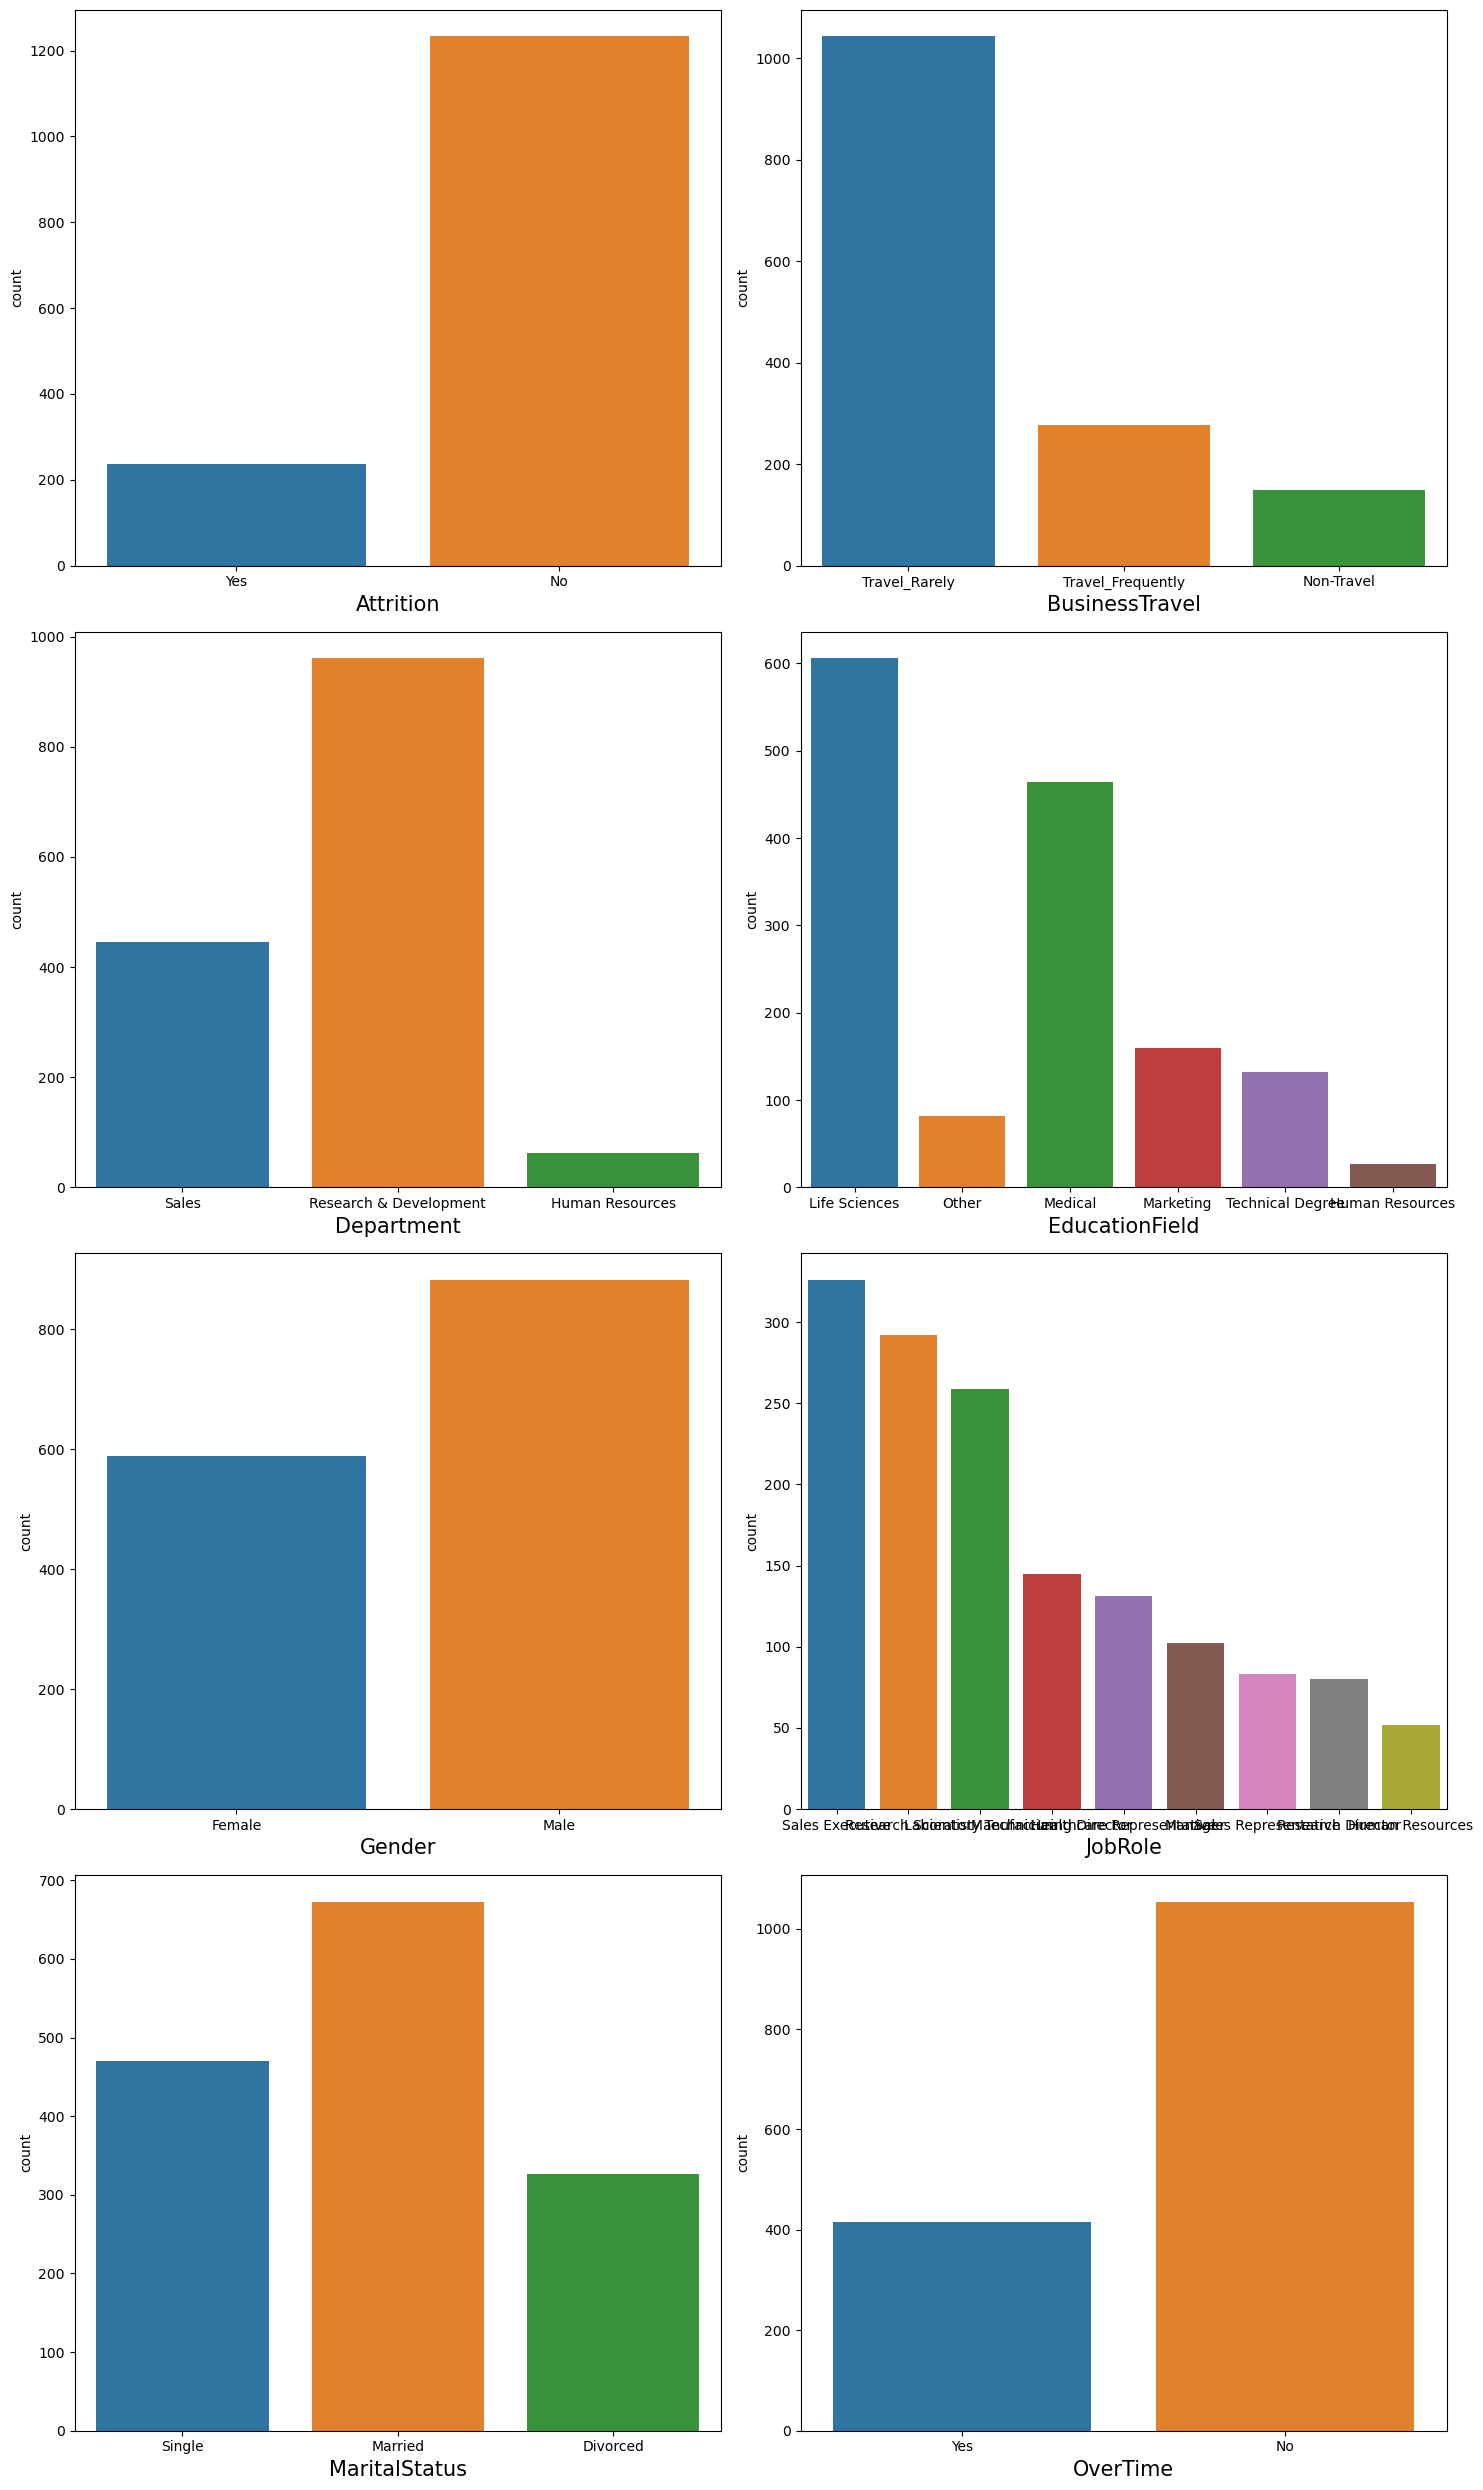

In [14]:
plt.figure(figsize=(15,25),facecolor='white')
plotnumber=1
for column in cat_col:
    if plotnumber <= 8:
        ax=plt.subplot(4,2,plotnumber)
        sns.countplot(df_hr[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

From the above graphs we can observe the followings :-  
- the number of employees leave the organization is very less compared to the retention rate.  
- Most of the employees travel rare for business.  
- Research and Developement department is having maximum number of employees.  
- Most of the employees are having Life sciences educational background follwed by medical,marketing,technical degree and least employees are from HR.  
- The no of male employees are greater than female employees.  
- Maximum employees are in sales executive job role and least emplyees are in HR.  
- The no of employees married more than single and divorced.  
- Employees doing overtime is comparatively less than doing overtime.  
#### Note: The dataset of target variable 'Attrition' is highly imbalance, we will do the sampling later.

### Checking for outliers for numerical column using boxplot

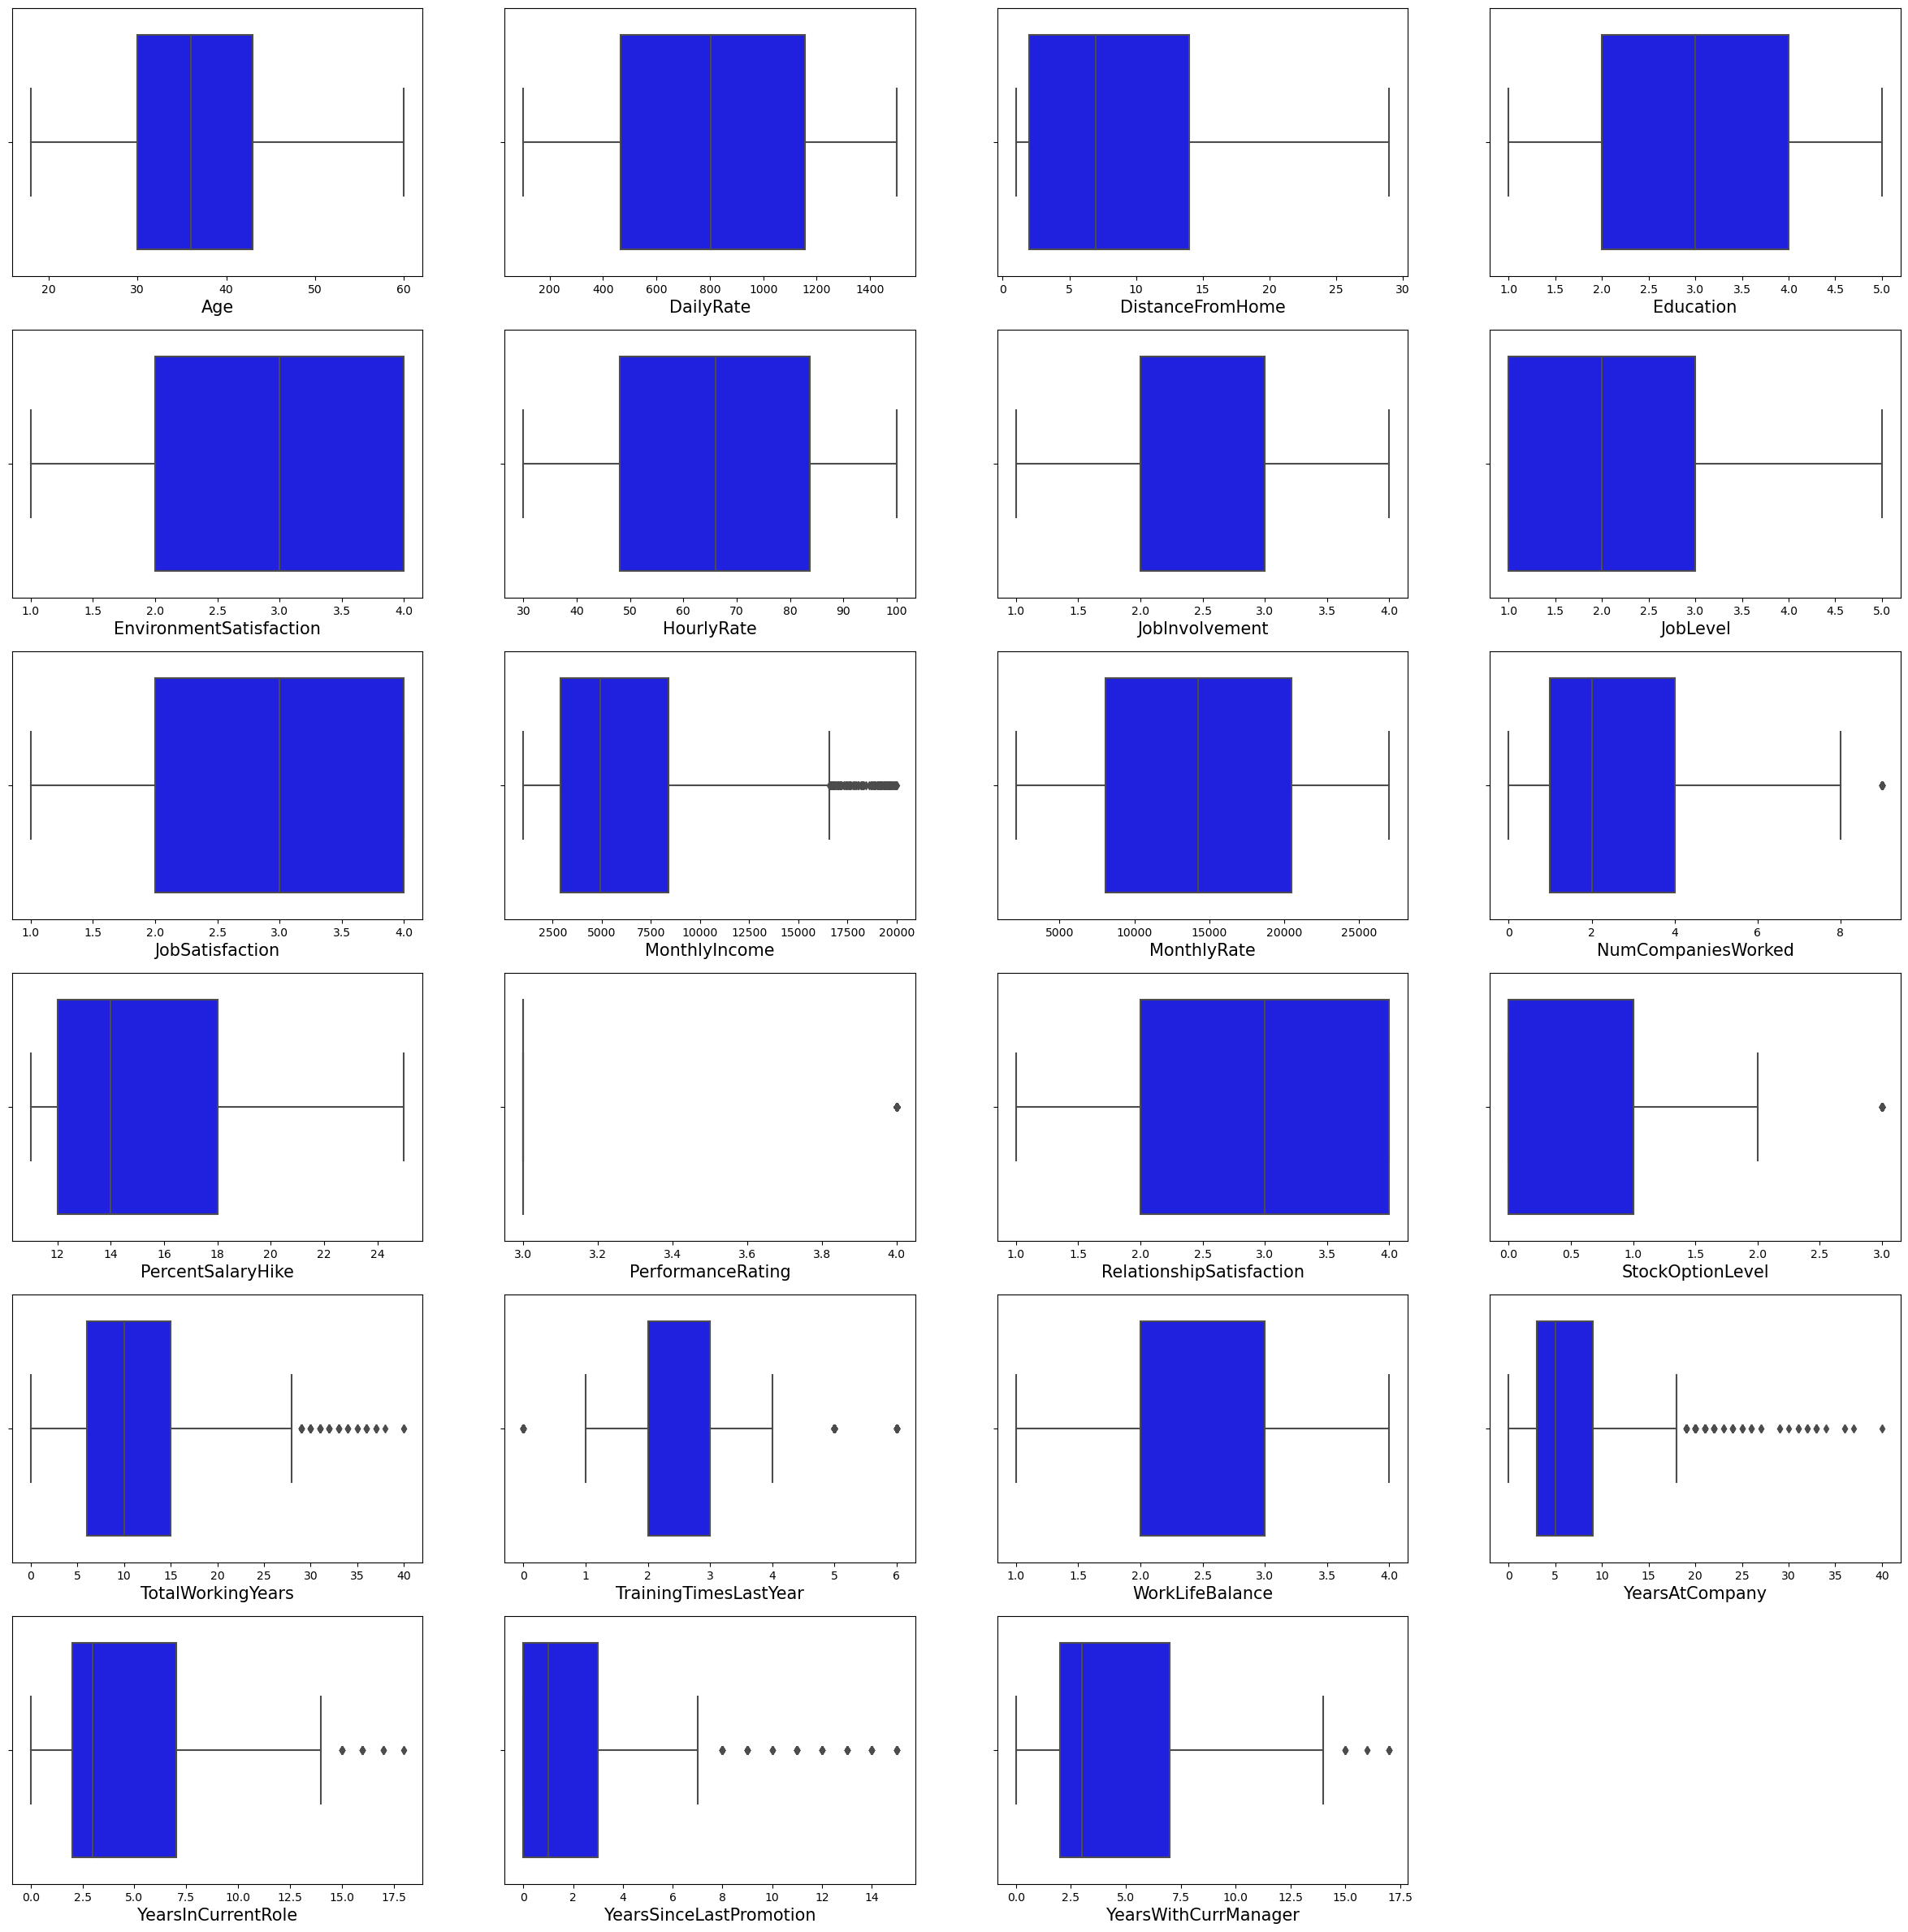

In [15]:
plt.figure(figsize=(30,30),facecolor='white')
graph=1
for column in num_col:
    if graph <= 23:
        ax=plt.subplot(6,4,graph)
        sns.boxplot(df_hr[column],color='b')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

From above we can see the columns 'MonthlyIncome','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion' and 'YearsWithCurrManager' are having outliers. So we need to remove them. 

### Removing outliers using z-score method

In [16]:
from scipy.stats import zscore
z=zscore(df_hr[['MonthlyIncome','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']])
abs_z=np.abs(z)
df_hr=df_hr[(abs_z<3).all(axis=1)]  #3-std deviation data
df_hr.shape

(1387, 31)

Before the size was (1470, 31).

### Encoding categorical data

In [17]:
# tranforming binary feature into 0 and 1
df_hr['Attrition'] = df_hr['Attrition'].map({'Yes': 1, 'No': 0})
df_hr['OverTime'] = df_hr['OverTime'].map({'Yes': 1, 'No': 0})
df_hr['Gender'] = df_hr['Gender'].map({'Male': 1, 'Female': 0})

In [18]:
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2


In [19]:
# Ordinal Encoding for ordinal features
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
def ord_encode(df_hr, column):
    df_hr[column] = oe.fit_transform(df_hr[column])
    return df_hr

oe_col = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
df_hr=ord_encode(df_hr, oe_col)
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1,...,3,4,1,6,3,3,2,2,2,2


### Correlation matrix using HeatMap

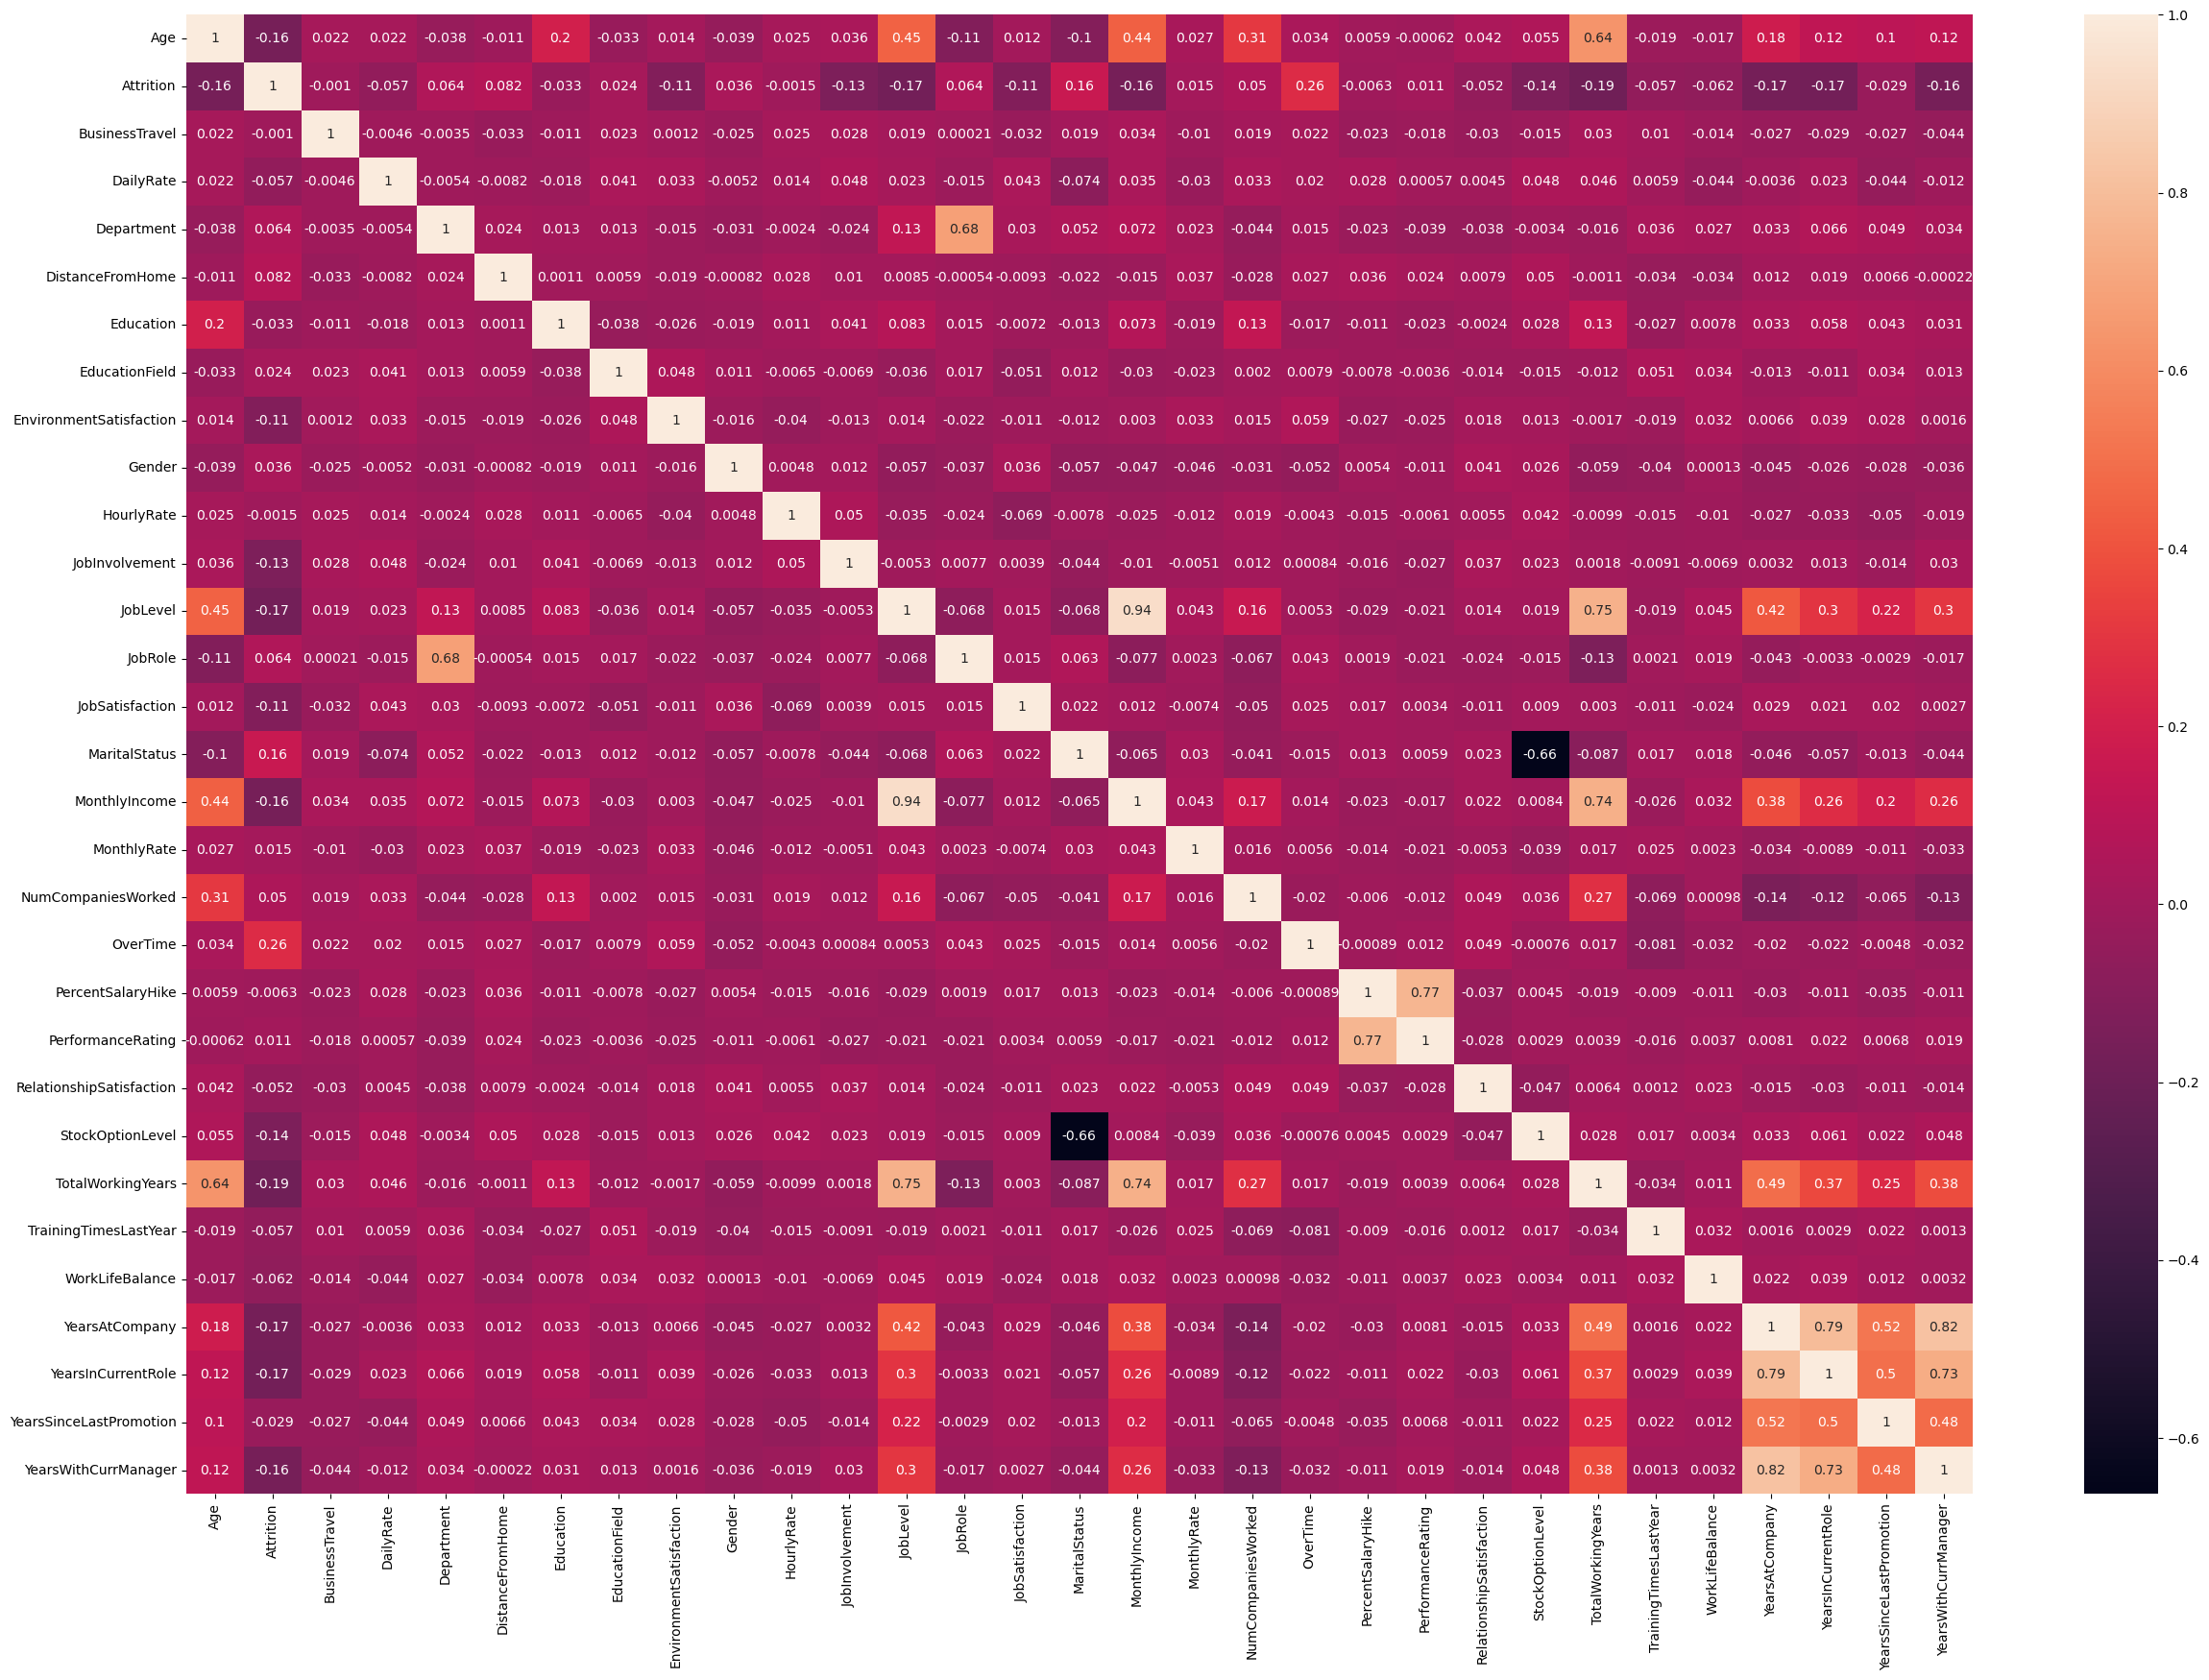

In [20]:
plt.figure(figsize=(30,20))
sns.heatmap(df_hr.corr(), annot = True)
plt.show()

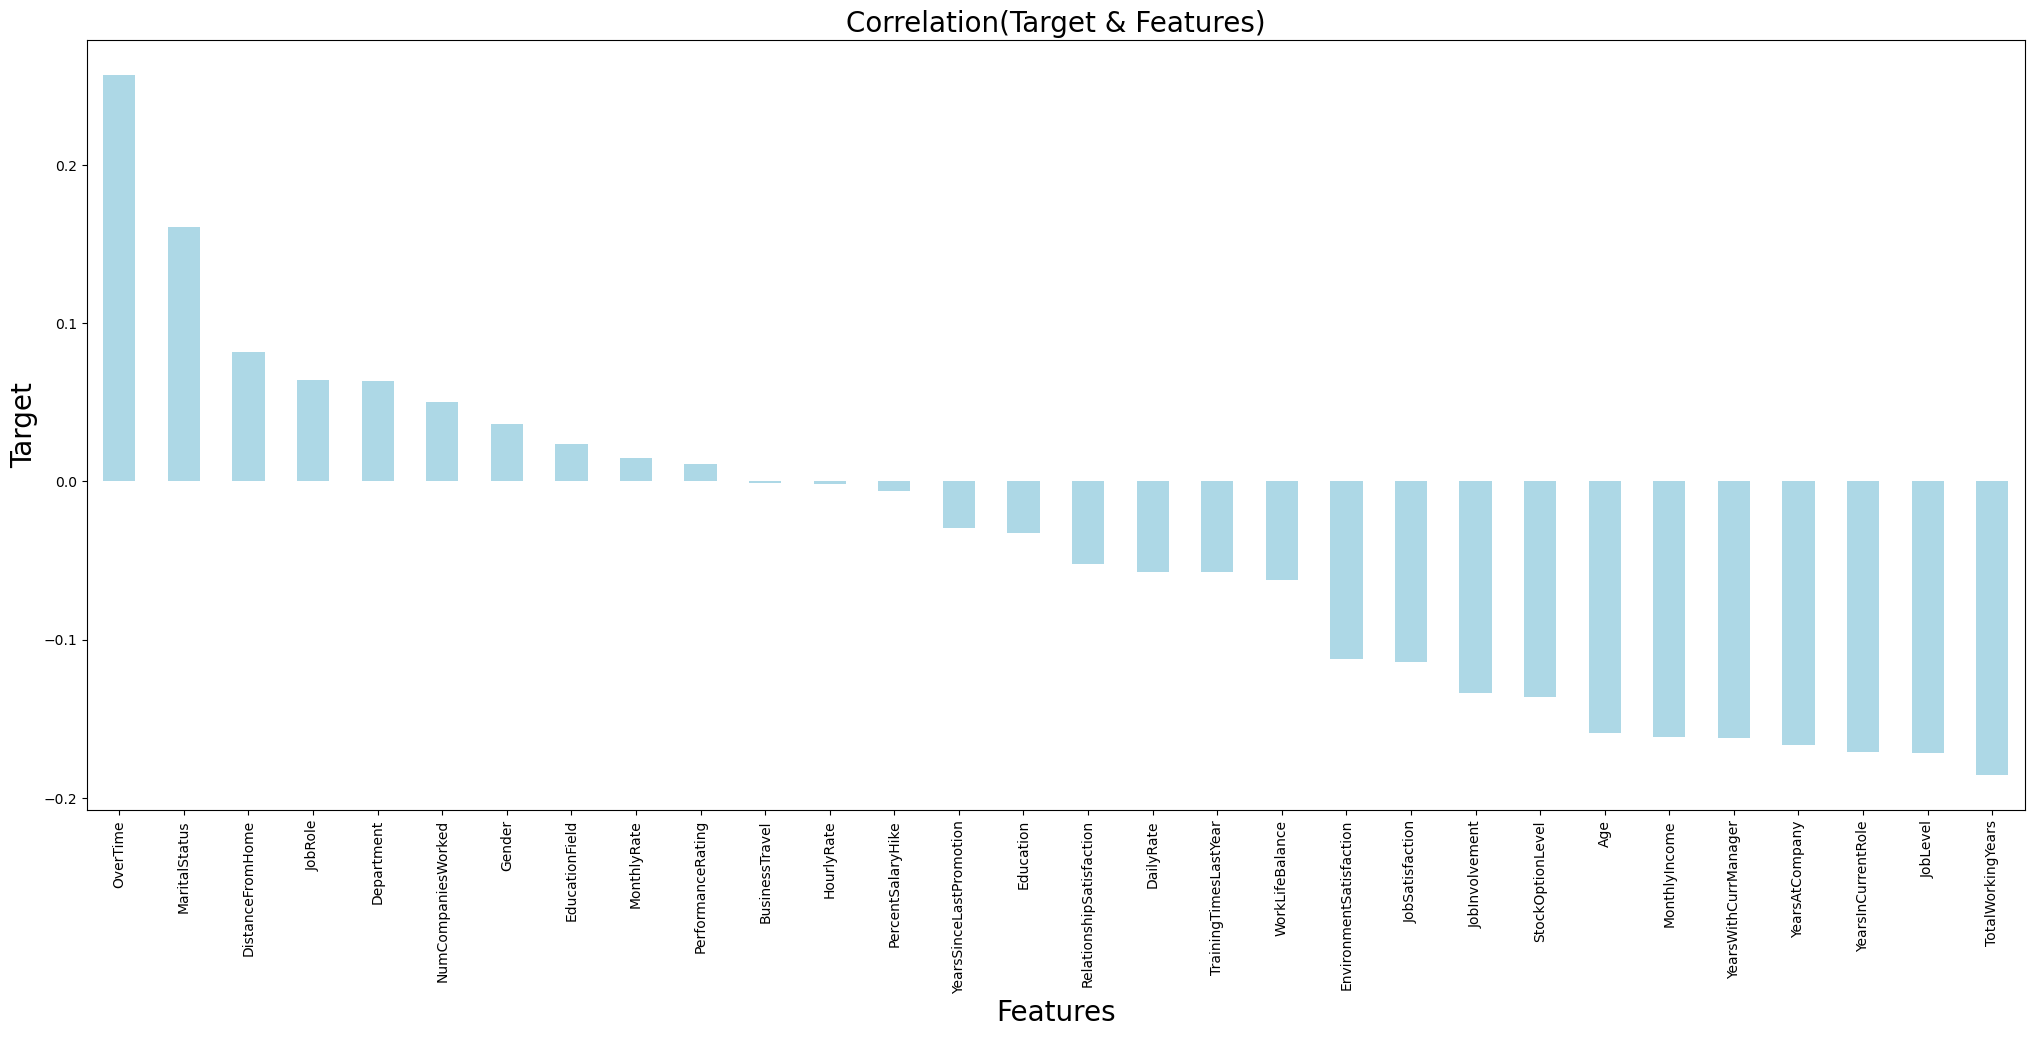

In [22]:
# visualization in plots
plt.figure(figsize =(25, 10))
df_hr.corr()['Attrition'].sort_values(ascending = False).drop(['Attrition']).plot(kind ='bar', color ='lightblue')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation(Target & Features)',fontsize=20)
plt.show()

From the above plot, We can observe the positive and negative correlated features with the target "Attrition".  
Age, JobLevel, MonthlyIncome is highly positively correlated with TotalWorkingYears.

### Separating the features and target

In [23]:
x = df_hr.drop(['Attrition'],axis=1)  #Features
y = df_hr['Attrition']   #Target

### Visualizing the relationship of features with the label 'Attrition'.

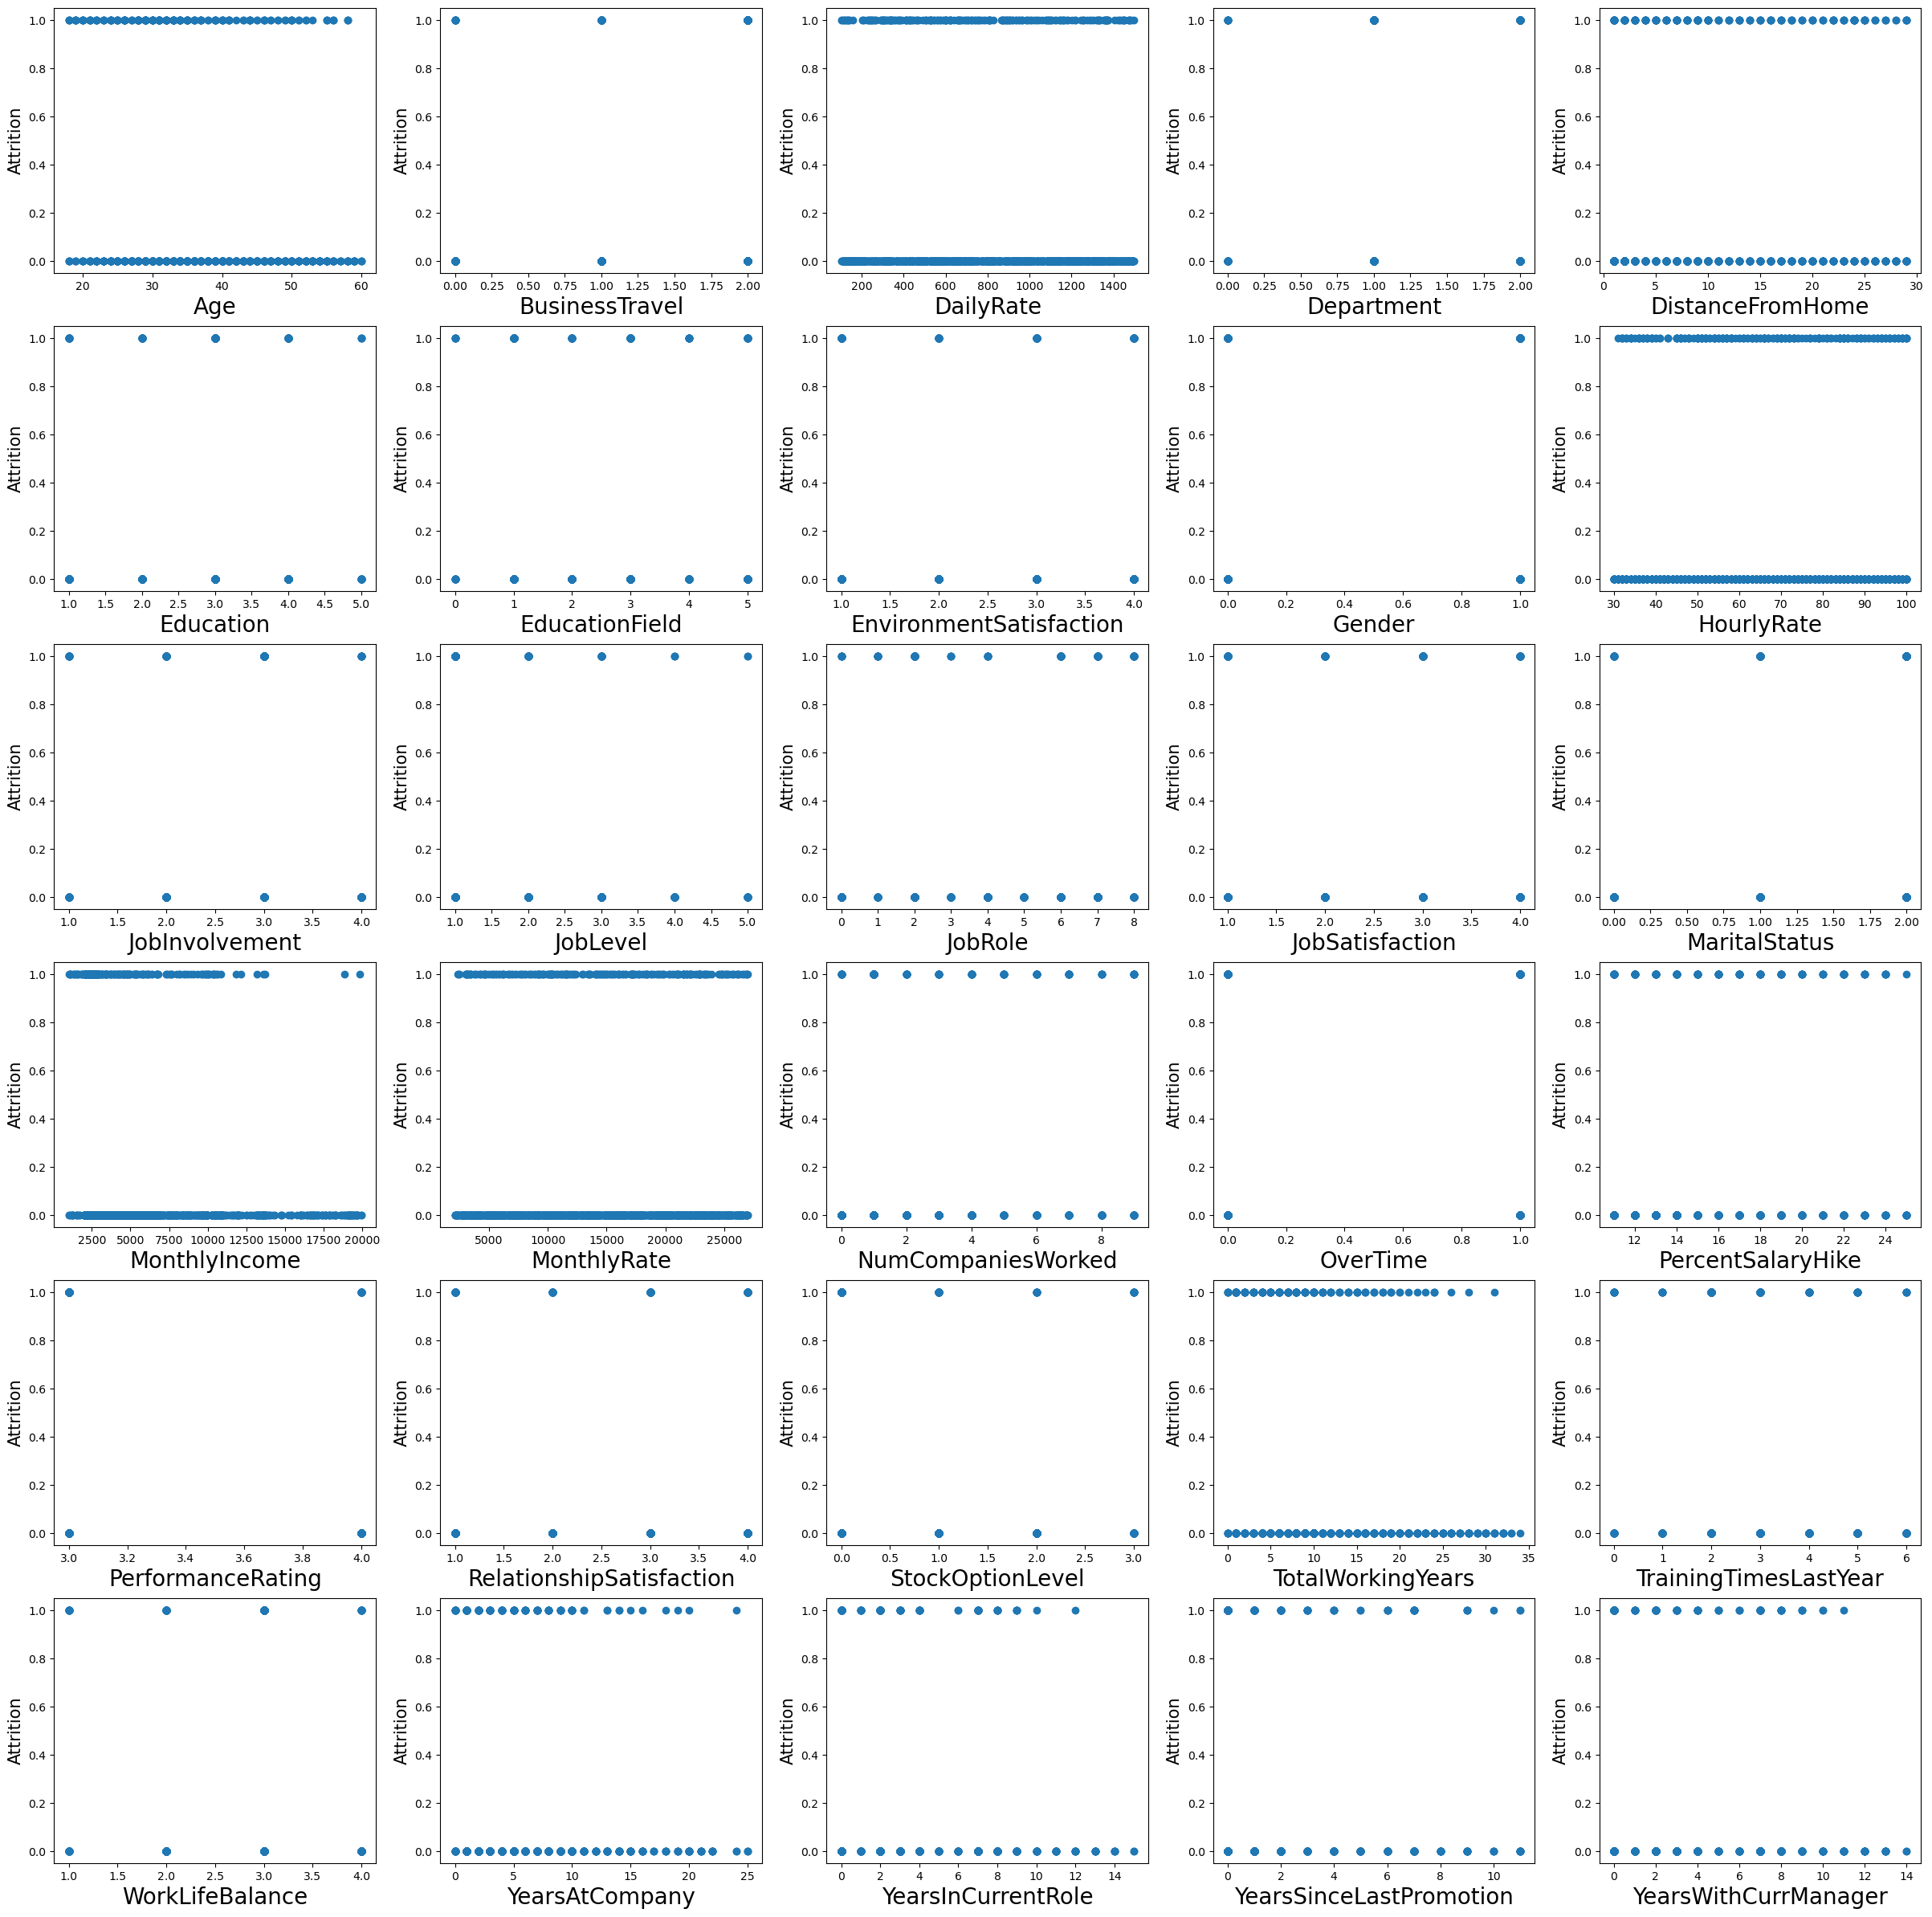

In [24]:
plt.figure(figsize=(30,30), facecolor='white')
plotnumber=1
for column in x:
    if plotnumber <= 30:
        ax=plt.subplot(6,5,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=15)
    plotnumber+=1
plt.show()

### Oversampling data using SMOTE

In [26]:
# Oversampling the data as our dataset is imbalance as we have checked before.
from imblearn.over_sampling import SMOTE
os=SMOTE()
x1,y1 = os.fit_resample(x,y)

In [27]:
#Now checking value count of target column
y1.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

Now the data is balanced.So there is no class imbalance.

### Splitting the dataset in Train and Test Set.

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.2, random_state=0)

Here using the 80% data for the training set and 20% data for the testing set.

#### Scaling data using Standard Scaler

In [30]:
#Standardize our data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Model Building(Classification)

### Decision Tree Classifier

In [31]:
model1 = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=None)
model1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [32]:
pred = model1.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model1, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 85%
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       246
           1       0.83      0.87      0.85       218

    accuracy                           0.85       464
   macro avg       0.85      0.85      0.85       464
weighted avg       0.85      0.85      0.85       464

Cross Validation Score: 0.781546892449939
Difference between Accuracy Score and Cross Validation Score is 0.06974621099833689


### Logistic Regression

In [33]:
model2 = LogisticRegression()
model2.fit(x_train, y_train) 

LogisticRegression()

In [34]:
pred = model2.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model2, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 85%
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       246
           1       0.82      0.86      0.84       218

    accuracy                           0.85       464
   macro avg       0.85      0.85      0.85       464
weighted avg       0.85      0.85      0.85       464

Cross Validation Score: 0.8406617666155883
Difference between Accuracy Score and Cross Validation Score is 0.006320992005101278


### Random Forest Classifier

In [35]:
model3 = RandomForestClassifier()
model3.fit(x_train, y_train)

RandomForestClassifier()

In [36]:
pred = model3.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model3, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 94%
Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       246
           1       0.95      0.92      0.94       218

    accuracy                           0.94       464
   macro avg       0.94      0.94      0.94       464
weighted avg       0.94      0.94      0.94       464

Cross Validation Score: 0.8608498039113834
Difference between Accuracy Score and Cross Validation Score is 0.08096054091620275


#### Here Random Forest Classifier looks like our best model as the accuracy is 94% and there is no much difference between Accuracy Score and Cross Validation Score.

### Hyper Parameter Tuning

In [37]:
#Random Forest Classifier
from sklearn.model_selection import GridSearchCV 

parameters = {'criterion':['entropy','gini'],
             'n_estimators':[20,30],
             'max_depth':[10,15],
             'min_samples_split':[10,11],
             'min_samples_leaf':[5,6]
             }

In [38]:
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [39]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [20, 30]})

In [40]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 30}

In [41]:
Final_model=RandomForestClassifier(criterion = 'gini',max_depth = 10,min_samples_leaf = 5,min_samples_split = 10,n_estimators = 30)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')

Model Accuracy : 91%


In [42]:
# Cross Validation Score
cv_score = (cross_val_score(Final_model, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Cross Validation Score: 0.8507570838635952
Difference between Accuracy Score and Cross Validation Score is 0.05872567475709445


Now we can see the difference between Accuracy Score and Cross Validation Score is reduced to a great extent.

### ROC AUC Curve

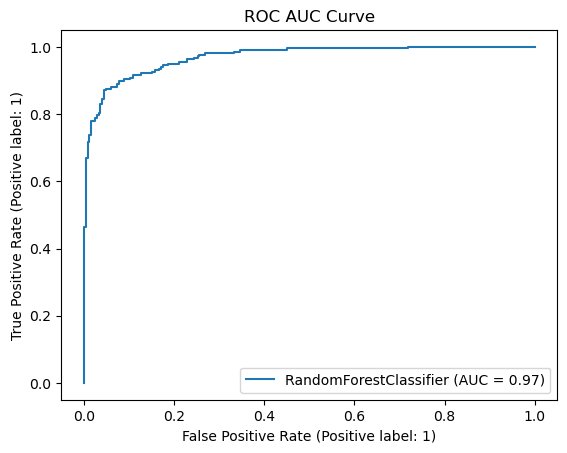

In [43]:
disp = metrics.plot_roc_curve(Final_model, x_test, y_test)
plt.title("ROC AUC Curve")
plt.show()

ROC Curve generated for final model and it shows the AUC score for final model is of 97%.

#### Saving the model

In [44]:
import joblib
joblib.dump(Final_model,"hr_attrition_analysis.pkl")

['hr_attrition_analysis.pkl']

Finally saved the best classification model for hr attrition Project analysis